In [1]:
!pip install yfinance
!pip install pandas_datareader

### Импорт библиотек и подготовка датасета

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']
for company, com_name in zip(company_list, company_name):
    company['company_name'] = com_name

df = pd.concat(company_list, axis=0)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-06-06,147.029999,148.570007,144.899994,146.139999,144.505112,71598400,APPLE
2022-06-07,144.350006,149.000000,144.100006,148.710007,147.046371,67808200,APPLE
2022-06-08,148.580002,149.869995,147.460007,147.960007,146.304764,53950200,APPLE
2022-06-09,147.080002,147.949997,142.529999,142.639999,141.044281,69473000,APPLE
2022-06-10,140.279999,140.759995,137.059998,137.130005,135.595917,91437900,APPLE


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-05-29,181.699997,184.080002,181.550003,182.020004,182.020004,32009300,AMAZON
2024-05-30,181.309998,181.339996,178.360001,179.320007,179.320007,29249200,AMAZON
2024-05-31,178.300003,179.210007,173.869995,176.440002,176.440002,58903900,AMAZON
2024-06-03,177.699997,178.699997,175.919998,178.339996,178.339996,30786600,AMAZON
2024-06-04,177.639999,179.820007,176.440002,179.339996,179.339996,26177000,AMAZON


### Описательная статистика

In [5]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,502.000000,502.000000,502.000000,502.000000,502.000000,5.020000e+02
mean,167.137929,168.824881,165.637171,167.301932,166.387623,6.591294e+07
std,18.819162,18.529878,19.003395,18.763881,19.058821,2.206083e+07
min,126.010002,127.769997,124.169998,125.019997,123.998459,2.404830e+07
25%,150.202499,152.542503,148.559998,150.832504,149.587608,5.052690e+07
50%,170.570007,172.199997,169.289993,170.559998,169.953575,6.085485e+07
75%,182.757504,184.617504,181.465000,182.905003,182.372379,7.570322e+07
max,198.020004,199.619995,197.000000,198.110001,197.589523,1.647624e+08


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2022-06-06 to 2024-06-04
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          502 non-null    float64
 1   High          502 non-null    float64
 2   Low           502 non-null    float64
 3   Close         502 non-null    float64
 4   Adj Close     502 non-null    float64
 5   Volume        502 non-null    int64  
 6   company_name  502 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.4+ KB


### Данные на момент закрытия биржи

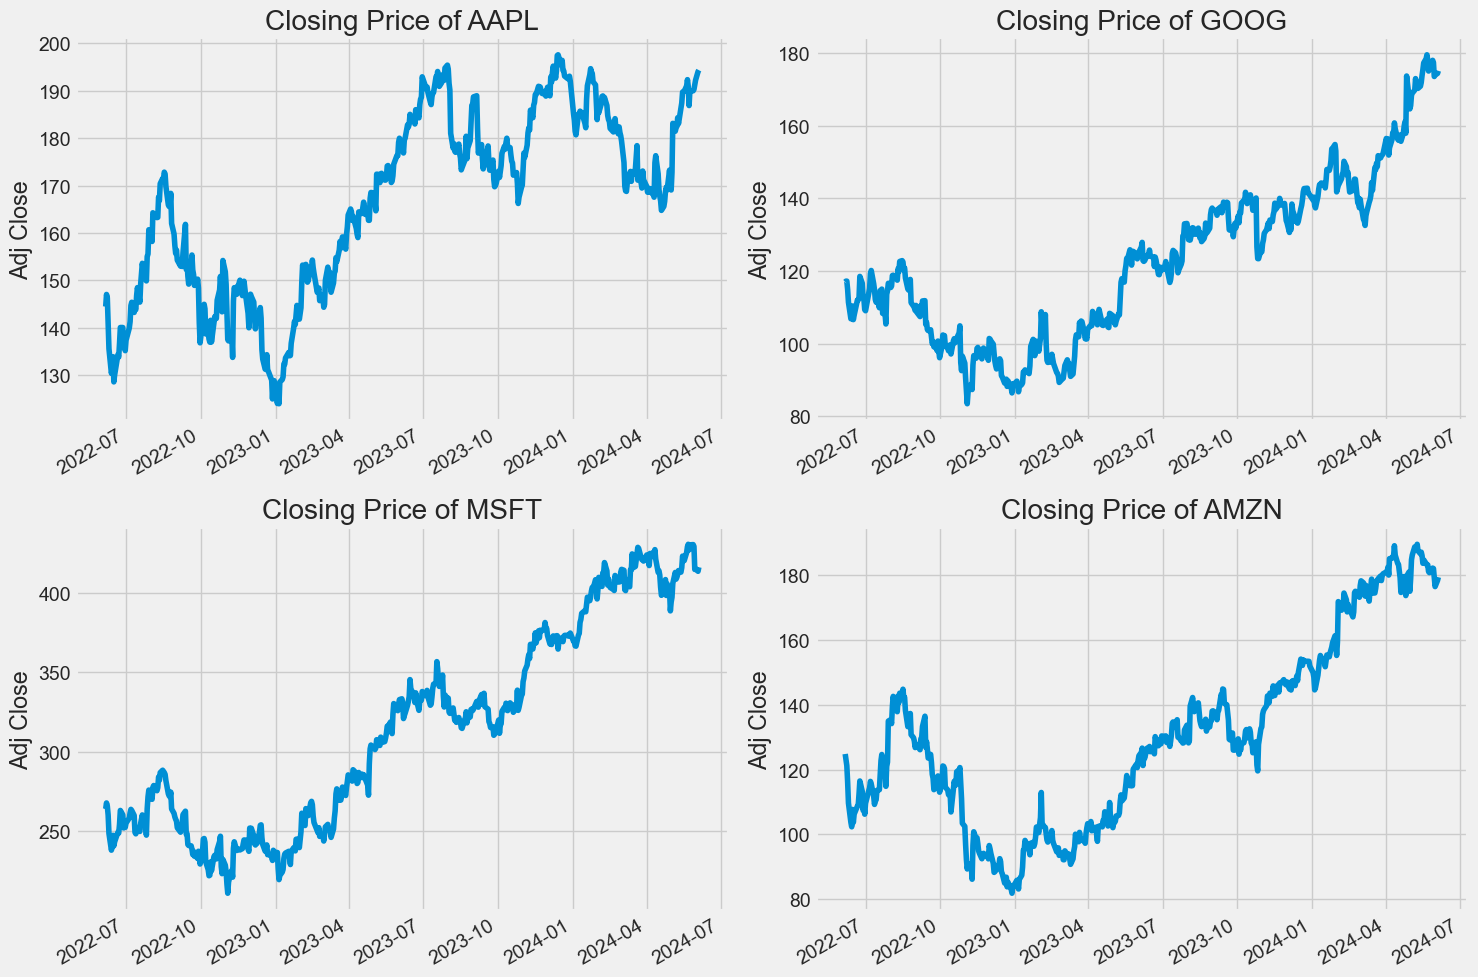

In [7]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f'Closing Price of {tech_list[i-1]}')

plt.tight_layout()

### Данные об объёме торгов

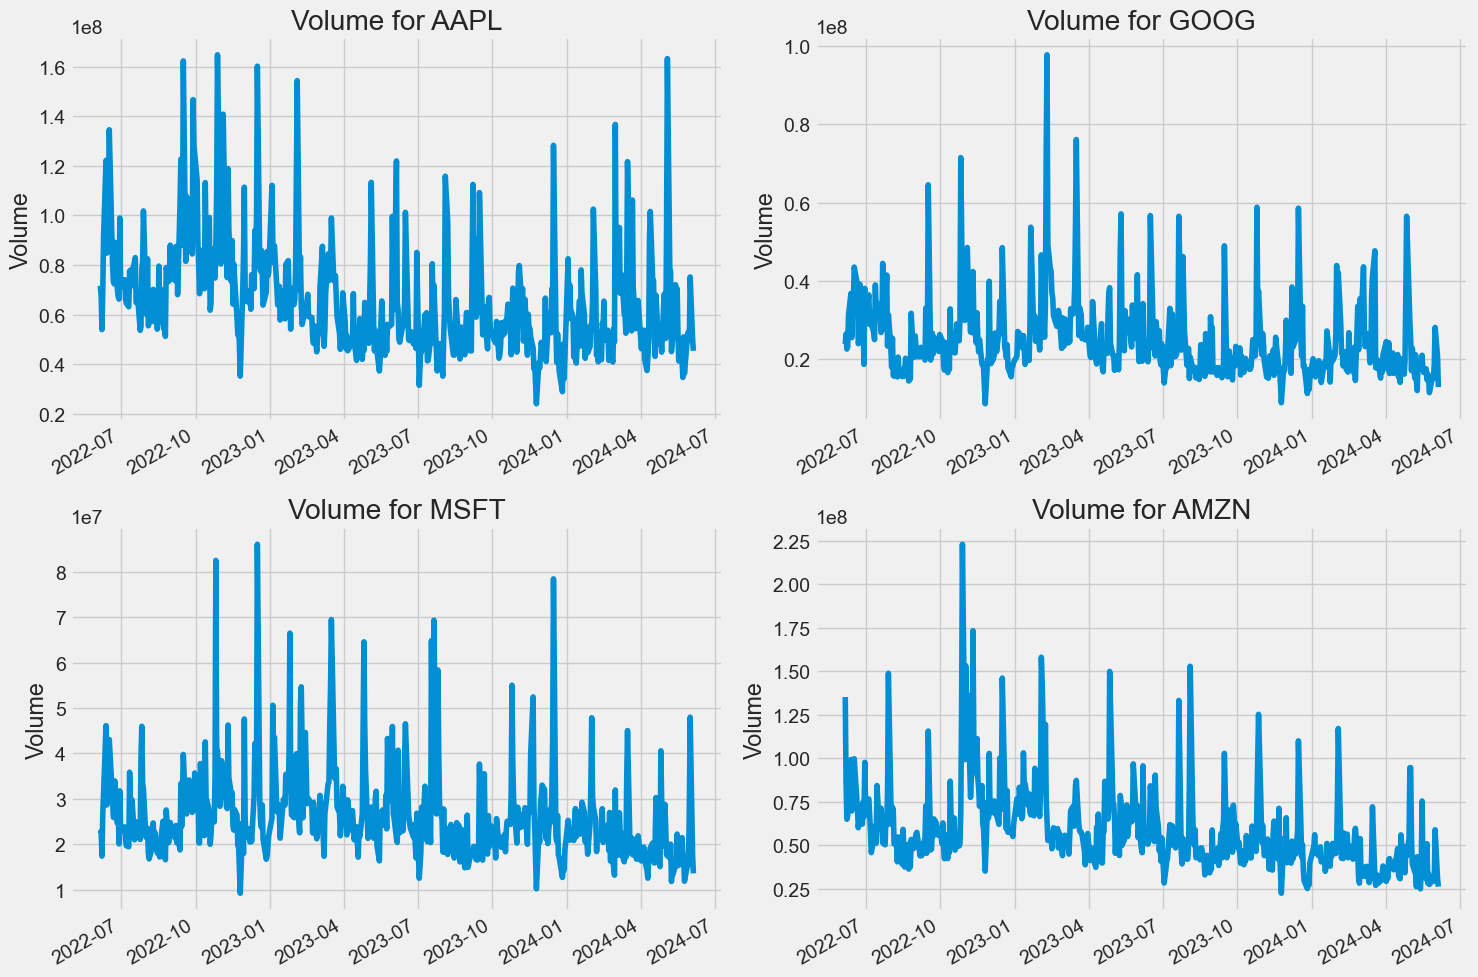

In [8]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f'Volume for {tech_list[i-1]}')

plt.tight_layout()

### Модель MA (moving average) скользящее среднее

Text(0.5, 1.0, 'AMAZON')

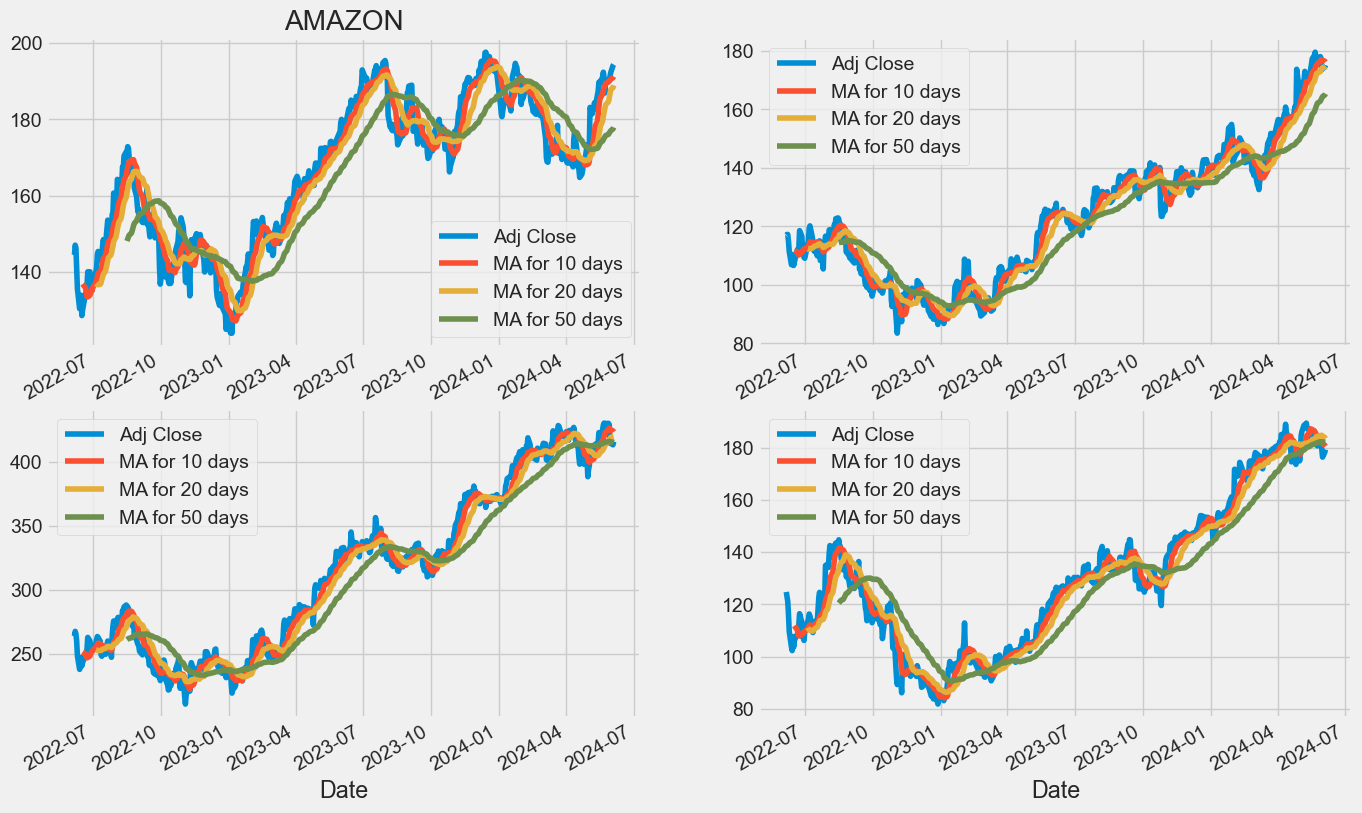

In [9]:
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in company_list:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,0].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[0,0].set_title('MICROSIFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[0,0].set_title('AMAZON')

### Дневные изменения

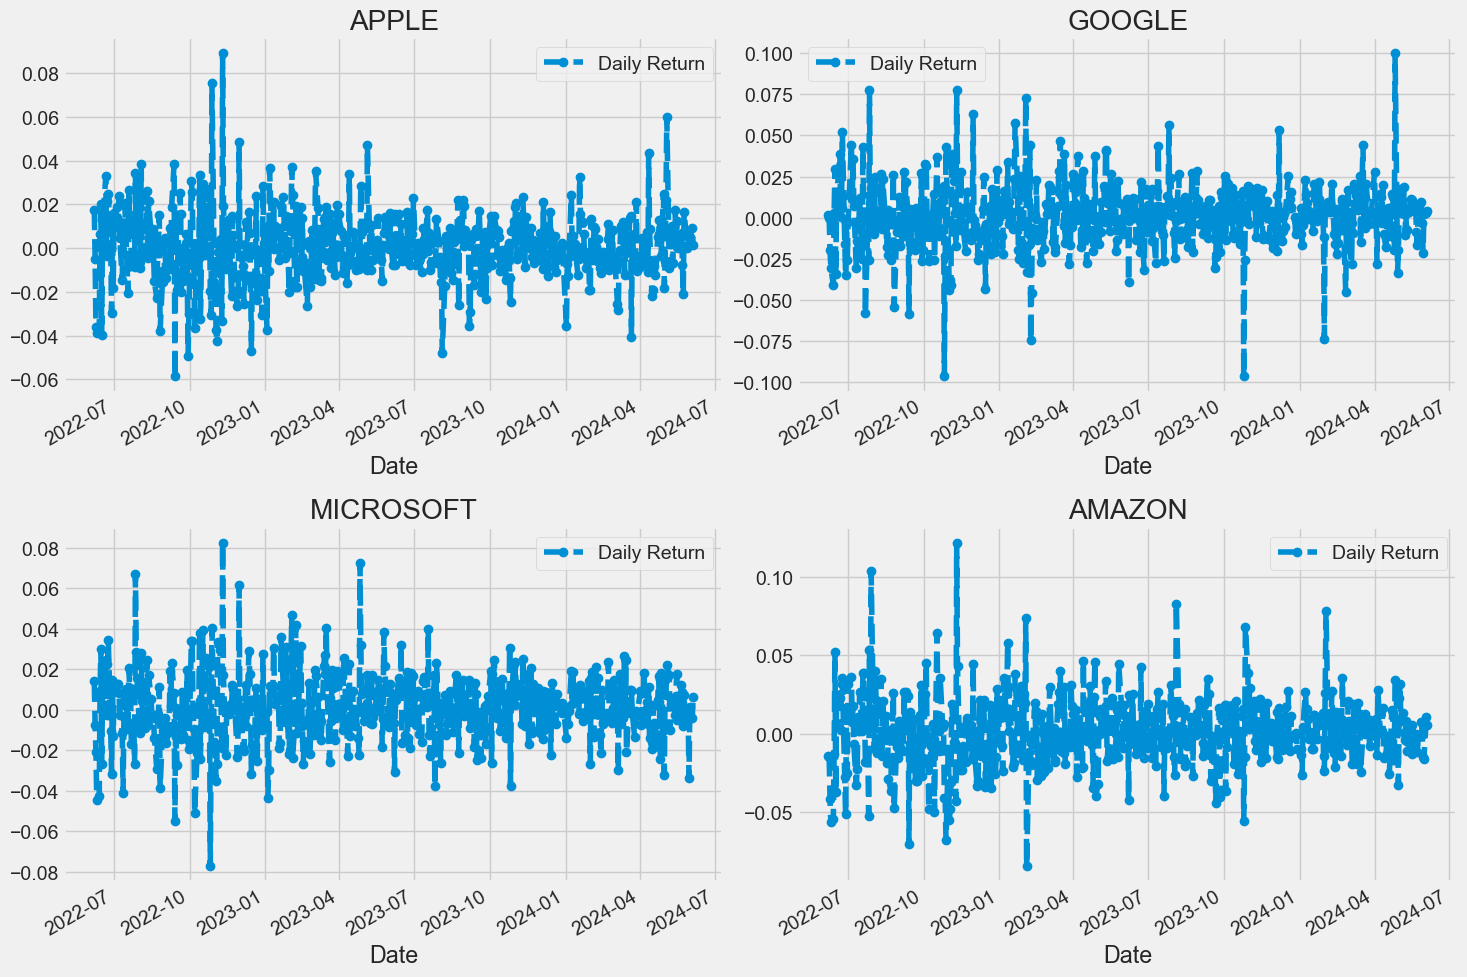

In [12]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

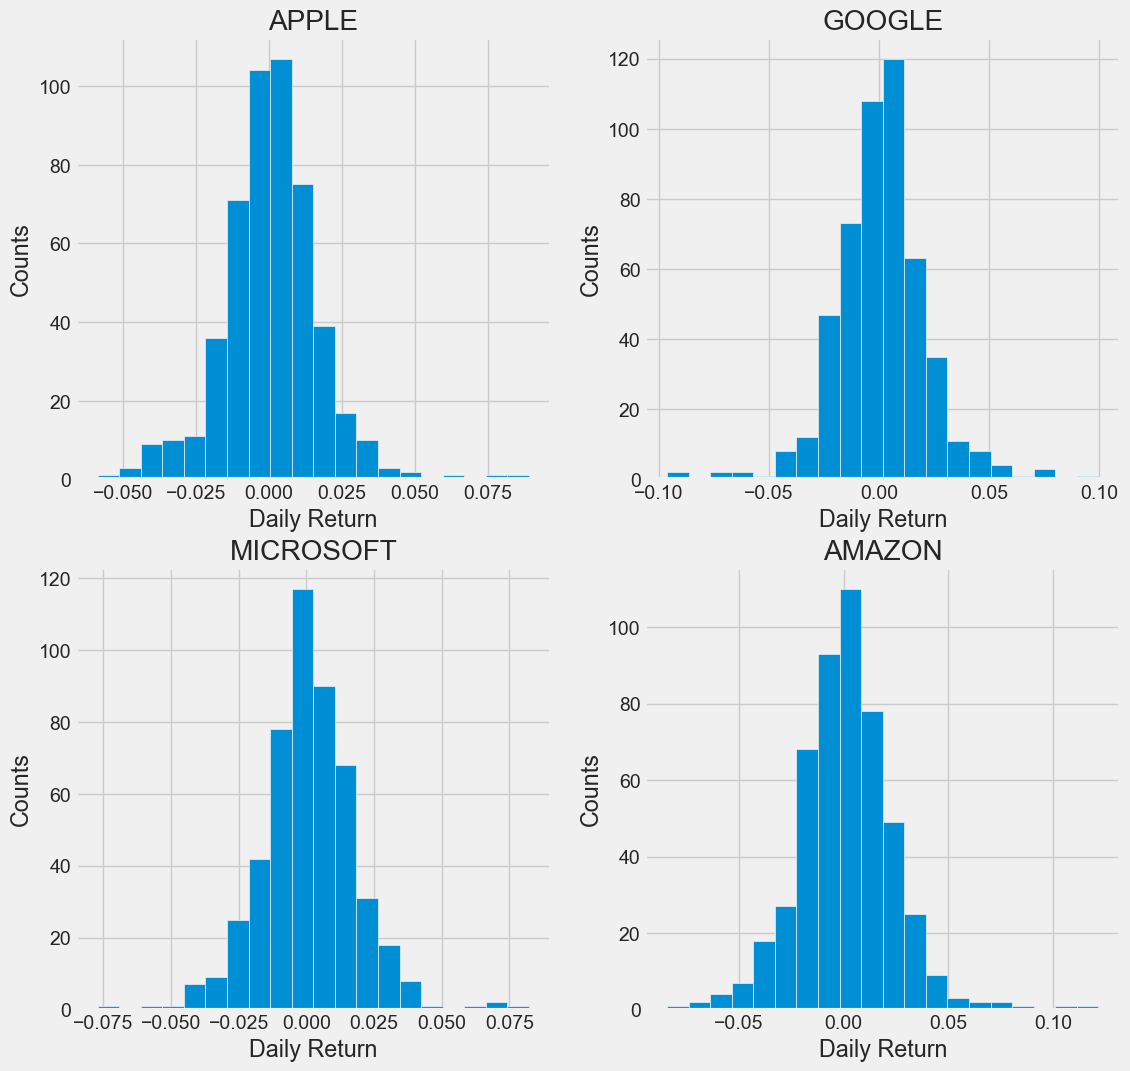

In [15]:
plt.figure(figsize=(12,12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Daily Return'].hist(bins=20)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i-1]}')

fig.tight_layout()

### Корреляция стоимости акций

In [16]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']
tech_rets = closing_df.pct_change()
tech_rets.head(10)

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-06-06,NaN,NaN,NaN,NaN
2022-06-07,0.017586,-0.014344,0.001872,0.013954
2022-06-08,-0.005044,-0.014797,0.000073,-0.007670
2022-06-09,-0.035955,-0.041508,-0.019789,-0.020783
2022-06-10,-0.038629,-0.055962,-0.030374,-0.044564
2022-06-13,-0.038285,-0.054537,-0.040843,-0.042413
2022-06-14,0.006672,-0.013119,0.002971,0.009205
2022-06-15,0.020112,0.052390,0.029820,0.029735
2022-06-16,-0.039651,-0.037243,-0.034011,-0.026970


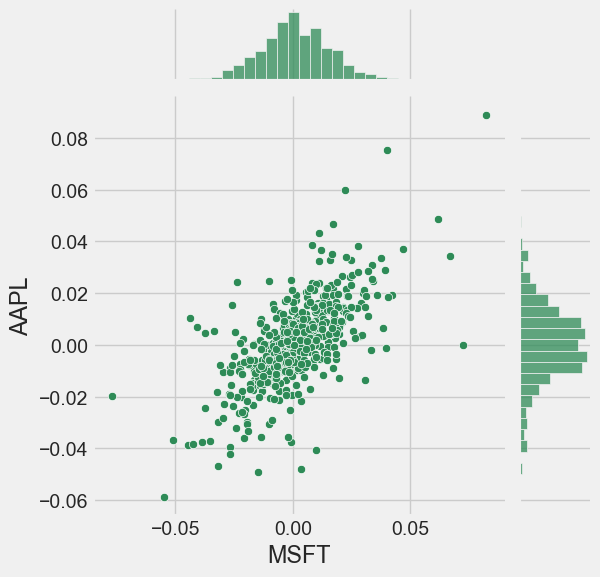

In [19]:
sns.jointplot(x='MSFT', y='AAPL', data=tech_rets, kind='scatter', color='seagreen')
plt.show()

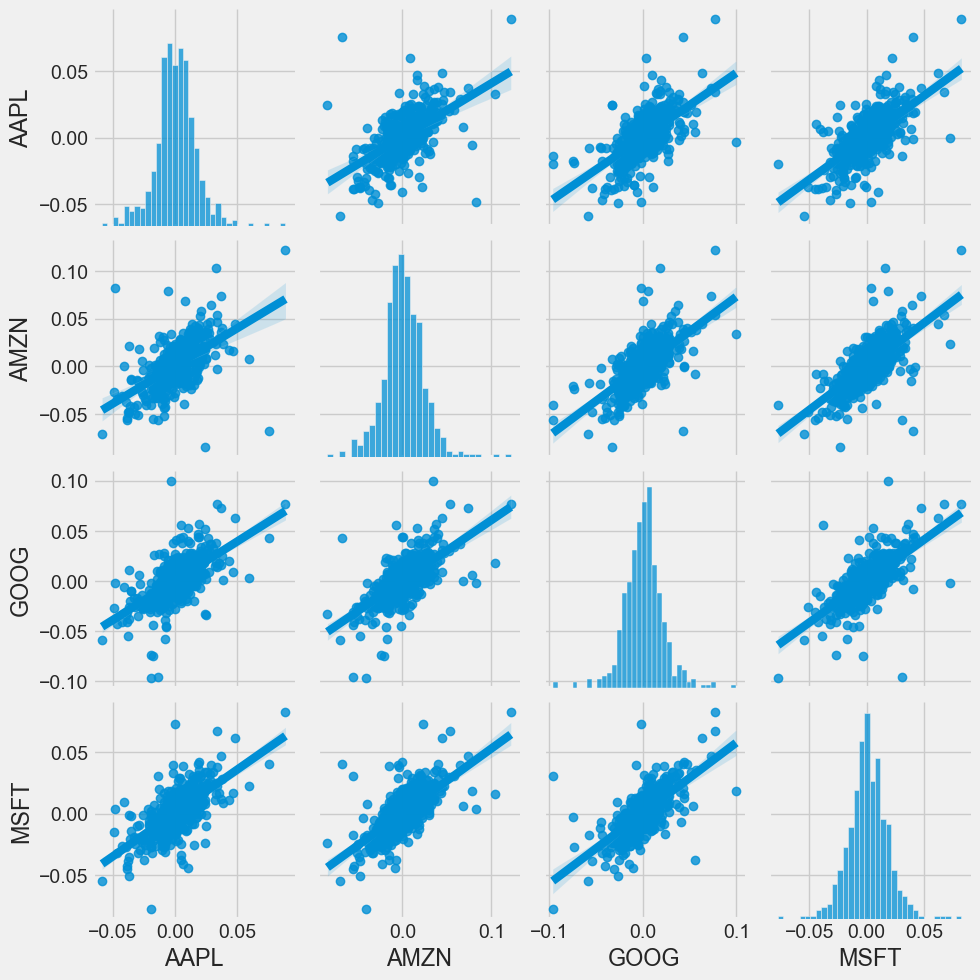

In [20]:
sns.pairplot(tech_rets, kind='reg')

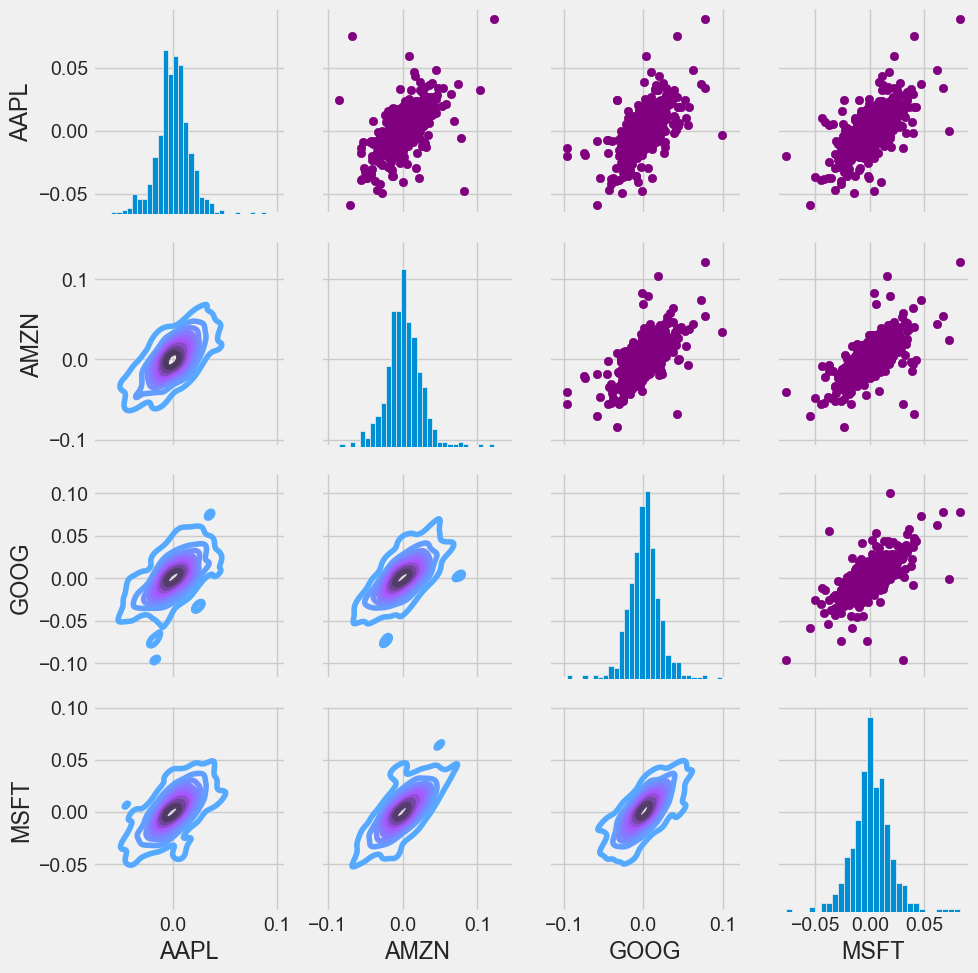

In [23]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)
plt.show()

Text(0.5, 1.0, 'Correlation of stock return')

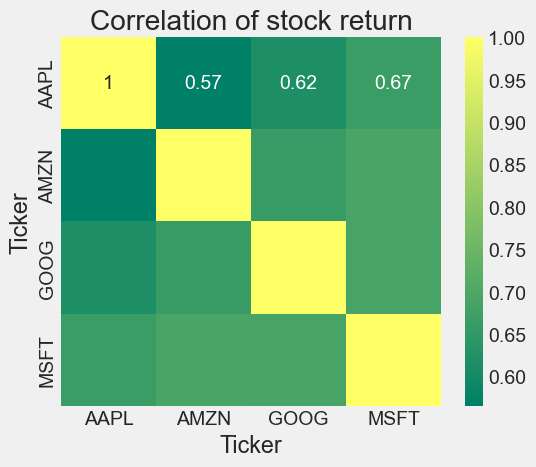

In [24]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')


### Предсказания данных цены закрытия для компании Apple

In [25]:
df = pdr.get_data_yahoo('AAPL', start = '2012-01-01', end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416982,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483713,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622309,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754259,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734028,394024400
...,...,...,...,...,...,...
2024-05-29,189.610001,192.250000,189.509995,190.289993,190.289993,53068000
2024-05-30,190.759995,192.179993,190.630005,191.289993,191.289993,49947900
2024-05-31,191.440002,192.570007,189.910004,192.250000,192.250000,75158300


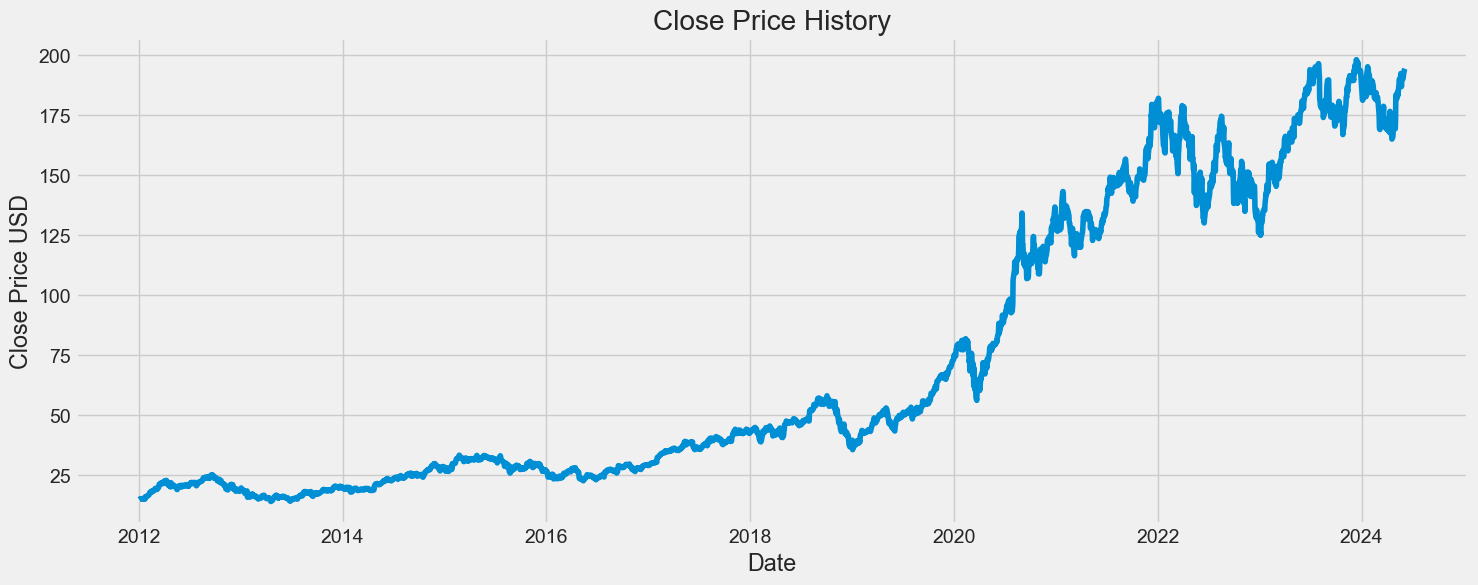

In [26]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.show()

In [27]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset)*0.95))
training_data_len

2969

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.96818027],
       [0.97784564],
       [0.97958328]])

In [29]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i < 61:
        print(x_train)
        print(y_train)

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]


In [30]:
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [31]:
x_train

array([[[0.00401431],
        [0.00444289],
        [0.00533302],
        ...,
        [0.04197573],
        [0.0434302 ],
        [0.04403914]],

       [[0.00444289],
        [0.00533302],
        [0.00618049],
        ...,
        [0.0434302 ],
        [0.04403914],
        [0.04253425]],

       [[0.00533302],
        [0.00618049],
        [0.00605056],
        ...,
        [0.04403914],
        [0.04253425],
        [0.04053485]],

       ...,

       [[0.97089527],
        [0.97561933],
        [0.98039774],
        ...,
        [0.90551826],
        [0.89541848],
        [0.89471255]],

       [[0.97561933],
        [0.98039774],
        [0.97344737],
        ...,
        [0.89541848],
        [0.89471255],
        [0.88618743]],

       [[0.98039774],
        [0.97344737],
        [0.98761964],
        ...,
        [0.89471255],
        [0.88618743],
        [0.87907416]]])

### Предсказание с использованием LSTM

In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2909/2909 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - loss: 0.0017
Epoch 2/3
2909/2909 ━━━━━━━━━━━━━━━━━━━━ 37s 13ms/step - loss: 4.4971e-04
Epoch 3/3
2909/2909 ━━━━━━━━━━━━━━━━━━━━ 37s 13ms/step - loss: 4.1556e-04


In [33]:
test_data =scaled_data[training_data_len-60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


5.341973745306692

In [34]:
rmse**2

28.536683495546008

In [37]:
valid

,Close,Predictions
Date,,
2023-10-20,172.880005,180.165955
2023-10-23,173.000000,177.999680
2023-10-24,173.440002,177.788330
2023-10-25,171.100006,178.473114
2023-10-26,166.889999,176.580780
...,...,...
2024-05-29,190.289993,194.889343
2024-05-30,191.289993,195.226624
2024-05-31,192.250000,196.099762


/var/folders/24/z61d72zx27z5ml8twybhwmm40000gn/T/ipykernel_1724/2895967901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


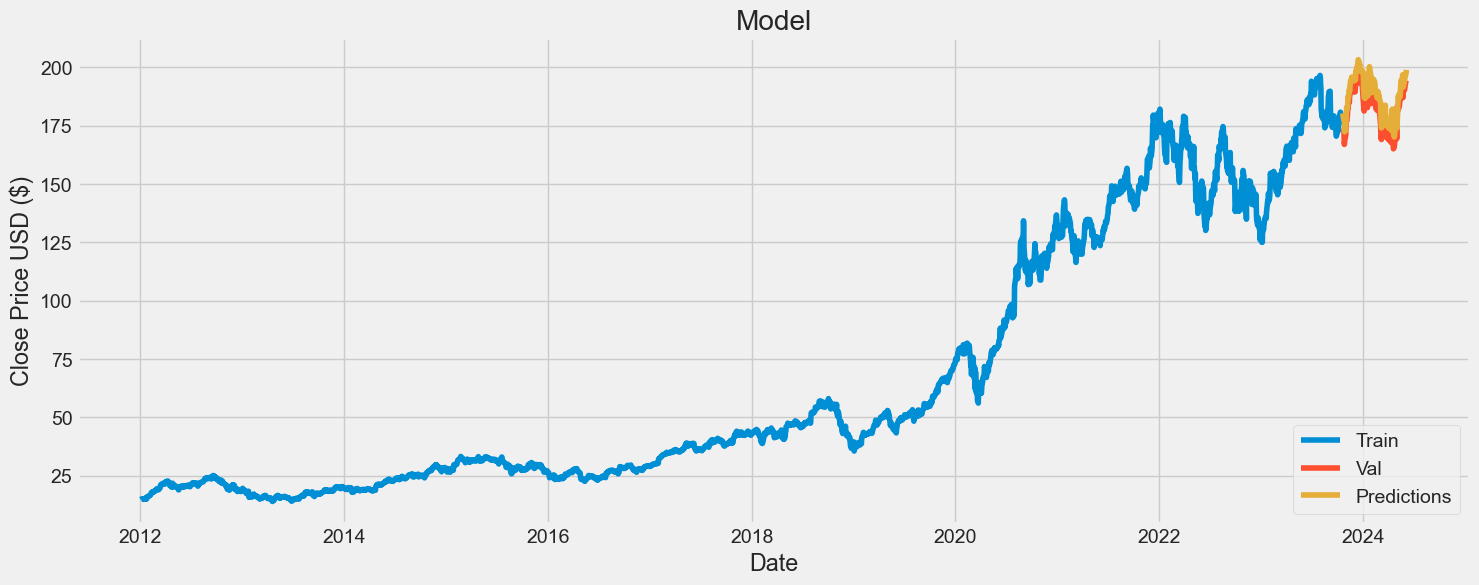

In [35]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()